In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing our own neural network library:
!git clone https://github.com/nam-ngh/myNN.git

Cloning into 'myNN'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 56 (delta 2), reused 10 (delta 2), pack-reused 45
Unpacking objects: 100% (56/56), 162.30 MiB | 10.38 MiB/s, done.
Updating files: 100% (8/8), done.


In [3]:
from myNN import myNN as nn

#### 1. Unpacking the cifar-10 dataset

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
#List of train data files:
data_batches = ['myNN/cifar10/data_batch_1','myNN/cifar10/data_batch_2','myNN/cifar10/data_batch_3','myNN/cifar10/data_batch_4','myNN/cifar10/data_batch_5',]
#Unpickling every batch in the list:
train_data_dicts = [unpickle(batch) for batch in data_batches]
#Unpickling test data file:
test_data_dict = unpickle('myNN/cifar10/test_batch')
#Unpickling label names file:
label_names_dicts = unpickle('myNN/cifar10/batches.meta')
label_names = [str(label, 'utf-8') for label in label_names_dicts[b'label_names']]

In [6]:
#Group batches and define train data:
x_train = np.empty(shape=(0,3072),dtype=np.uint8)
y_train = []
for dict in train_data_dicts:
    x_train = np.append(x_train, dict[b'data'], axis = 0)
    y_train += dict[b'labels']
y_train = np.asarray(y_train)

#Define test data:
x_test = np.array(test_data_dict[b'data'])
y_test = np.array(test_data_dict[b'labels'])

#Convert x to image format:
x_train = x_train.reshape(50000,3,32,32).transpose(0,2,3,1)
x_test = x_test.reshape(10000,3,32,32).transpose(0,2,3,1)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


We now have the train and test data. Let's try plotting some of the images

In [7]:
#function to plot 6 random images from the dataset:
def plot_6(x=x_test,y=y_test,y_hat=None):
    fig, ax = plt.subplots(2,3)
    i_list = np.random.randint(low=0, high=10000, size = 6) #generate list of random indices
    i=0
    for row in ax:
        for col in row:
            col.axis('off')
            #get image:
            img = x[i_list[i]]
            col.imshow(img)
            #get label:
            label_no = y[i_list[i]]
            label = label_names[label_no]
    
            if y_hat: #print predictions if they have been made
                predicted_label_no = y_hat[i_list[i]]
                predicted_label = label_names[predicted_label_no]
                col.set_title(f'Index: {i_list[i]}\nLabel: {label}\nPredicted: {predicted_label}',
                              loc='left', fontdict={'fontsize': 8})
                fig.suptitle('Example Predictions')
            else: 
                col.set_title(f'Index: {i_list[i]}\nLabel: {label}',
                              loc='left', fontdict={'fontsize': 8})
                fig.suptitle('Example Images')
            
            #update to the next generated index
            i+=1
    plt.show()

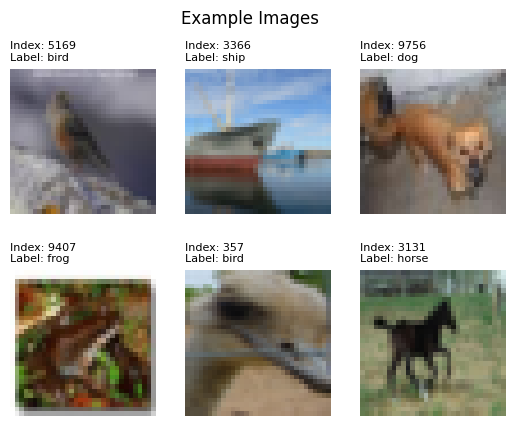

In [8]:
plot_6()

#### 2. Models building/training
To start with using our neural network library, we try building a simple network with just one hidden layer:

In [29]:
mlp = nn.NN()

mlp.add(nn.FlattenLayer())
mlp.add(nn.DenseLayer(units_in=3072, units_out=768, init_weights_stdev= np.sqrt(2/3072))) # kaiming weights initialization
mlp.add(nn.ActivationLayer('relu'))
mlp.add(nn.DenseLayer(units_in=768, units_out=10)) # random weights initialization
mlp.add(nn.ActivationLayer('softmax'))

In [27]:
# preprocess data with min max scaling:
x_train_scaled = x_train / 255 - 0.5
x_test_scaled = x_test / 255 - 0.5

In [30]:
# train the model:
mlp.train(x_train_scaled[:3000], y_train[:3000], epochs=30, learn_rate=0.00015)

100%|███████████████████████████████████████| 3000/3000 [00:33<00:00, 89.78it/s]


Epoch: 0, Loss: 2.1488317534054175, Accuracy: 22.7%


100%|███████████████████████████████████████| 3000/3000 [00:33<00:00, 88.53it/s]


Epoch: 1, Loss: 1.8913883738695976, Accuracy: 33.93333333333333%


100%|███████████████████████████████████████| 3000/3000 [00:33<00:00, 90.61it/s]


Epoch: 2, Loss: 1.7699404721097207, Accuracy: 39.1%


100%|███████████████████████████████████████| 3000/3000 [00:32<00:00, 91.79it/s]


Epoch: 3, Loss: 1.6858502574435519, Accuracy: 42.46666666666667%


100%|███████████████████████████████████████| 3000/3000 [00:32<00:00, 93.35it/s]


Epoch: 4, Loss: 1.6206869256860468, Accuracy: 45.2%


100%|███████████████████████████████████████| 3000/3000 [00:32<00:00, 93.62it/s]


Epoch: 5, Loss: 1.5664296318767177, Accuracy: 47.8%


100%|███████████████████████████████████████| 3000/3000 [00:34<00:00, 88.03it/s]


Epoch: 6, Loss: 1.5196171808199597, Accuracy: 50.333333333333336%


100%|███████████████████████████████████████| 3000/3000 [00:34<00:00, 87.93it/s]


Epoch: 7, Loss: 1.4781130637988236, Accuracy: 51.96666666666667%


100%|███████████████████████████████████████| 3000/3000 [00:34<00:00, 87.16it/s]


Epoch: 8, Loss: 1.440760757491417, Accuracy: 53.3%


100%|███████████████████████████████████████| 3000/3000 [00:34<00:00, 86.88it/s]


Epoch: 9, Loss: 1.4066051877532224, Accuracy: 55.3%


100%|███████████████████████████████████████| 3000/3000 [00:34<00:00, 86.37it/s]


Epoch: 10, Loss: 1.3749210408805996, Accuracy: 56.46666666666667%


100%|███████████████████████████████████████| 3000/3000 [00:33<00:00, 88.63it/s]


Epoch: 11, Loss: 1.3454039110604123, Accuracy: 57.86666666666667%


100%|███████████████████████████████████████| 3000/3000 [00:34<00:00, 87.13it/s]


Epoch: 12, Loss: 1.3175603904805524, Accuracy: 59.333333333333336%


100%|███████████████████████████████████████| 3000/3000 [00:34<00:00, 87.32it/s]


Epoch: 13, Loss: 1.2912833783679594, Accuracy: 60.266666666666666%


100%|███████████████████████████████████████| 3000/3000 [00:34<00:00, 88.08it/s]


Epoch: 14, Loss: 1.2663560982747697, Accuracy: 61.333333333333336%


100%|███████████████████████████████████████| 3000/3000 [00:34<00:00, 87.09it/s]


Epoch: 15, Loss: 1.2426407551214582, Accuracy: 62.63333333333333%


100%|███████████████████████████████████████| 3000/3000 [00:35<00:00, 85.34it/s]


Epoch: 16, Loss: 1.2200384491191631, Accuracy: 63.63333333333333%


100%|███████████████████████████████████████| 3000/3000 [00:34<00:00, 87.84it/s]


Epoch: 17, Loss: 1.1983541686288994, Accuracy: 65.03333333333333%


100%|███████████████████████████████████████| 3000/3000 [00:34<00:00, 87.63it/s]


Epoch: 18, Loss: 1.1776157071926945, Accuracy: 65.9%


100%|███████████████████████████████████████| 3000/3000 [00:34<00:00, 86.70it/s]


Epoch: 19, Loss: 1.1575446390789523, Accuracy: 66.56666666666666%


100%|███████████████████████████████████████| 3000/3000 [00:34<00:00, 87.27it/s]


Epoch: 20, Loss: 1.1382045693249647, Accuracy: 67.43333333333334%


100%|███████████████████████████████████████| 3000/3000 [00:33<00:00, 89.56it/s]


Epoch: 21, Loss: 1.1195201298534991, Accuracy: 68.76666666666667%


100%|███████████████████████████████████████| 3000/3000 [00:32<00:00, 92.51it/s]


Epoch: 22, Loss: 1.1014609235356643, Accuracy: 69.73333333333333%


100%|███████████████████████████████████████| 3000/3000 [00:31<00:00, 94.22it/s]


Epoch: 23, Loss: 1.0839584929766526, Accuracy: 70.56666666666666%


100%|███████████████████████████████████████| 3000/3000 [00:32<00:00, 93.23it/s]


Epoch: 24, Loss: 1.0669358983493833, Accuracy: 71.33333333333333%


100%|███████████████████████████████████████| 3000/3000 [00:31<00:00, 94.10it/s]


Epoch: 25, Loss: 1.0503460118865684, Accuracy: 72.1%


100%|███████████████████████████████████████| 3000/3000 [00:32<00:00, 93.01it/s]


Epoch: 26, Loss: 1.0341341979824759, Accuracy: 72.86666666666666%


100%|███████████████████████████████████████| 3000/3000 [00:31<00:00, 93.90it/s]


Epoch: 27, Loss: 1.01840494385366, Accuracy: 73.6%


100%|███████████████████████████████████████| 3000/3000 [00:32<00:00, 91.99it/s]


Epoch: 28, Loss: 1.0029952695458135, Accuracy: 74.23333333333333%


100%|███████████████████████████████████████| 3000/3000 [00:33<00:00, 90.60it/s]

Epoch: 29, Loss: 0.9880242291142209, Accuracy: 75.16666666666667%


In [31]:
def get_test_acc(model):
  correct_pred = 0
  for i in range(x_test_scaled.shape[0]):
    p = model.forwardpass(x_test_scaled[i])
    if np.argmax(p) == y_test[i]:
      correct_pred += 1
  return correct_pred/y_test.shape[0]


In [32]:
get_test_acc(mlp)

0.4153